In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
 (X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

0  :  5923
1  :  6742
2  :  5958
3  :  6131
4  :  5842
5  :  5421
6  :  5918
7  :  6265
8  :  5851
9  :  5949


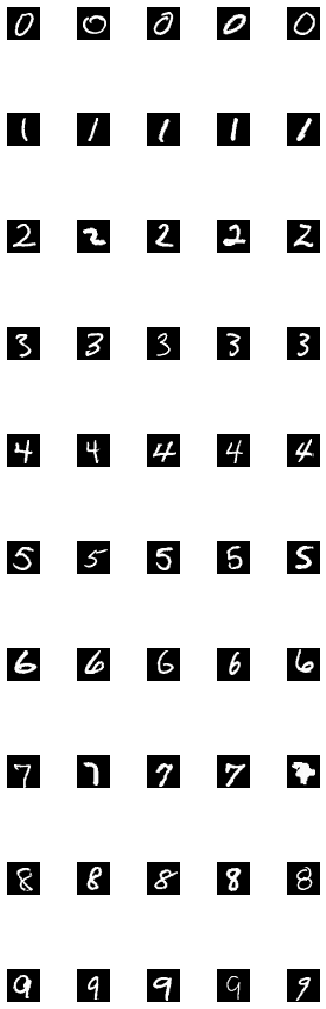

In [7]:
fig, axes = plt.subplots(nrows = 10, ncols = 5, figsize=(5,15))
fig.tight_layout()
for i in range(10):
    for j in range(5):
        img = X_train[y_train==i][np.random.randint(0,len(X_train[y_train==i]))]
        axes[i][j].imshow(img, cmap='gray')
        axes[i][j].axis('off')
    print(i, ' : ', len(X_train[y_train==i]))

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

In [10]:
X_train.shape

(60000, 784)

In [11]:
X_test.shape

(10000, 784)

In [0]:
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test = keras.utils.np_utils.to_categorical(y_test, 10)

In [13]:
y_train.shape

(60000, 10)

In [14]:
y_test.shape

(10000, 10)

In [23]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim = 784))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 500)               392500    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               50100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [26]:
h = model.fit(X_train, y_train, epochs=15, batch_size=100, validation_split=0.1, verbose=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 4s 82us/step - loss: 0.6067 - acc: 0.8105 - val_loss: 0.1548 - val_acc: 0.9540
Epoch 2/15
54000/54000 [==============================] - 4s 75us/step - loss: 0.2669 - acc: 0.9250 - val_loss: 0.1046 - val_acc: 0.9702
Epoch 3/15
54000/54000 [==============================] - 4s 73us/step - loss: 0.2026 - acc: 0.9433 - val_loss: 0.0979 - val_acc: 0.9718
Epoch 4/15
54000/54000 [==============================] - 4s 74us/step - loss: 0.1763 - acc: 0.9505 - val_loss: 0.0813 - val_acc: 0.9765
Epoch 5/15
54000/54000 [==============================] - 4s 72us/step - loss: 0.1542 - acc: 0.9572 - val_loss: 0.0702 - val_acc: 0.9803
Epoch 6/15
54000/54000 [==============================] - 4s 76us/step - loss: 0.1377 - acc: 0.9622 - val_loss: 0.0744 - val_acc: 0.9798
Epoch 7/15
54000/54000 [==============================] - 4s 72us/step - loss: 0.1232 - acc: 0.9659 - val_loss: 0.0721 - val_acc:

In [27]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 1s 58us/step


[0.0765347425701184, 0.9795]

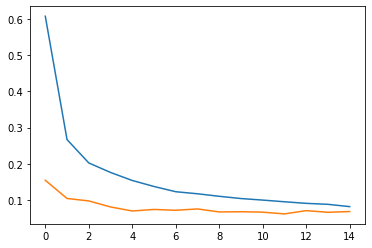

In [28]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])

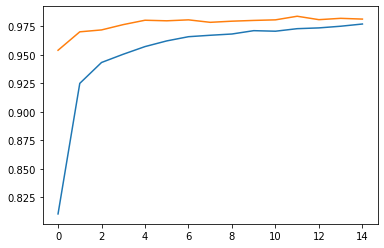

In [29]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])